# TBOX Generation

In [1]:
#import rdflib
from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.namespace import DC, RDF, FOAF, RDFS, XSD #import already in RDFlib integrated namespaces 
#for visualization
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
from rdflib import Graph, Namespace, RDF, RDFS, URIRef

We define the namespaces and create the graph:

In [2]:

# For Classes and properties 
DBO = Namespace("http://dbpedia.org/ontology/")
# For instances
DBR = Namespace("http://dbpedia.org/resource/")
# For Custom properties or resources defined locally
EX = Namespace("http://example.org/")

g = Graph()

Defining the classes with schema-level triples:

In [3]:
g.add((DBO.Author, RDF.type, RDFS.Class))
g.add((DBO.Paper, RDF.type, RDFS.Class))

g.add((DBO.Conference, RDF.type, RDFS.Class))
g.add((DBO.ConferenceEdition, RDF.type, RDFS.Class))

g.add((DBO.Journal, RDF.type, RDFS.Class))
g.add((DBO.JournalVolume, RDF.type, RDFS.Class))

g.add((DBO.Reviewer, RDF.type, RDFS.Class))
g.add((DBO.Review, RDF.type, RDFS.Class))
g.add((DBO.ConferenceChair, RDF.type, RDFS.Class))
g.add((DBO.JournalEditor, RDF.type, RDFS.Class))
g.add((DBO.Person, RDF.type, RDFS.Class))
g.add((DBO.Coordinator, RDF.type, RDFS.Class))

g.add((DBO.Keyword, RDF.type, RDFS.Class))

<Graph identifier=Neaa1531b2da143218f7077a1f14c4166 (<class 'rdflib.graph.Graph'>)>

Now the properties:

In [4]:
# Paper -is_written-> Author
g.add((DBO.is_written, RDF.type, RDF.Property))
g.add((DBO.is_written, RDFS.domain, DBO.Paper))
g.add((DBO.is_written, RDFS.range, DBO.Author))
# Paper -is_corresponding_author-> Author
g.add((DBO.is_corresponding_author, RDF.type, RDF.Property))
g.add((DBO.is_corresponding_author, RDFS.range, DBO.Author))
g.add((DBO.is_corresponding_author, RDFS.domain, DBO.Paper))
# Paper -presentedAt-> ConferenceEdition
g.add((DBO.presentedAt , RDF.type, RDF.Property))
g.add((DBO.presentedAt , RDFS.domain, DBO.Paper))
g.add((DBO.presentedAt , RDFS.range, DBO.ConferenceEdition))
# Paper -published_in-> JournalVolume
g.add((DBO.published_in , RDF.type, RDF.Property))
g.add((DBO.published_in , RDFS.domain, DBO.Paper))
g.add((DBO.published_in , RDFS.range, DBO.JournalVolume))
# ConferenceEdition -is_edition_of_conf-> Conference
g.add((DBO.is_edition_of_conf , RDF.type, RDF.Property))
g.add((DBO.is_edition_of_conf , RDFS.domain, DBO.ConferenceEdition))
g.add((DBO.is_edition_of_conf , RDFS.range, DBO.Conference))
# JournalVolume -is_volume_of-> Journal
g.add((DBO.is_volume_of , RDF.type, RDF.Property))
g.add((DBO.is_volume_of , RDFS.domain, DBO.JournalVolume))
g.add((DBO.is_volume_of , RDFS.range, DBO.Journal))
# Paper -cites-> Paper
g.add((DBO.cites, RDF.type, RDF.Property))
g.add((DBO.cites, RDFS.domain, DBO.Paper))
g.add((DBO.cites, RDFS.range, DBO.Paper))
# Paper -is_about-> Keyword
g.add((DBO.is_about, RDF.type, RDF.Property))
g.add((DBO.is_about, RDFS.domain, DBO.Paper))
g.add((DBO.is_about, RDFS.range, DBO.Keyword))
# ConferenceChair -organizes_conference-> Conference
g.add((DBO.organizes_conference, RDF.type, RDF.Property))
g.add((DBO.organizes_conference, RDFS.domain, DBO.ConferenceChair))
g.add((DBO.organizes_conference, RDFS.range, DBO.Conference))
# JournalEditor -edits-> Journal
g.add((DBO.edits, RDF.type, RDF.Property))
g.add((DBO.edits, RDFS.domain, DBO.JournalEditor))
g.add((DBO.edits, RDFS.range, DBO.Journal))
# Review -is_assigned_by-> Coordinator
g.add((DBO.is_assigned_by, RDF.type, RDF.Property))
g.add((DBO.is_assigned_by, RDFS.domain, DBO.Review))
g.add((DBO.is_assigned_by, RDFS.range, DBO.Coordinator))
# Review -review_written_by-> Reviewer
g.add((DBO.review_written_by, RDF.type, RDF.Property))
g.add((DBO.review_written_by, RDFS.domain, DBO.Review))
g.add((DBO.review_written_by, RDFS.range, DBO.Reviewer))
# Review -corresponds_to_paper-> Paper
g.add((DBO.corresponds_to_paper, RDF.type, RDF.Property))
g.add((DBO.corresponds_to_paper, RDFS.domain, DBO.Review))
g.add((DBO.corresponds_to_paper, RDFS.range, DBO.Paper))  

<Graph identifier=Neaa1531b2da143218f7077a1f14c4166 (<class 'rdflib.graph.Graph'>)>

Next the subproperties and subclasses:

In [5]:
# is_corresponding_author -subPropertyOf-> is_written
g.add((DBO.is_corresponding_author, RDFS.subPropertyOf, DBO.is_written))
# Author -subClassOf-> Person
g.add((DBO.Author, RDFS.subClassOf, DBO.Person))
# Reviewer -subClassOf-> Author
g.add((DBO.Reviewer, RDFS.subClassOf, DBO.Author))
# Coordinator-subClassOf-> Person
g.add((DBO.Coordinator, RDFS.subClassOf, DBO.Person))
# ConferenceChair-subClassOf-> Coordinator
g.add((DBO.ConferenceChair, RDFS.subClassOf, DBO.Coordinator))
# JournalEditor-subClassOf-> Coordinator
g.add((DBO.JournalEditor, RDFS.subClassOf, DBO.Coordinator))

<Graph identifier=Neaa1531b2da143218f7077a1f14c4166 (<class 'rdflib.graph.Graph'>)>

Also creating the attributes that contain xsd:string

In [6]:
# Every person has a name
g.add((DBO.name, RDF.type, RDF.Property))
g.add((DBO.name, RDFS.domain, DBO.Person))
g.add((DBO.name, RDFS.range, XSD.string))
# Every paper has a title
g.add((DBO.title, RDF.type, RDF.Property))
g.add((DBO.title, RDFS.domain, DBO.Paper))
g.add((DBO.title, RDFS.range, XSD.string))
# Every paper has an abstract
g.add((DBO.abstract, RDF.type, RDF.Property))
g.add((DBO.abstract, RDFS.domain, DBO.Paper))
g.add((DBO.abstract, RDFS.range, XSD.string))
# Every paper has a year that it was written
g.add((DBO.year_written, RDF.type, RDF.Property))
g.add((DBO.year_written, RDFS.domain, DBO.Paper))
g.add((DBO.year_written, RDFS.range, XSD.string))
# Every keyword has a name
g.add((DBO.keyword_name, RDF.type, RDF.Property))
g.add((DBO.keyword_name, RDFS.domain, DBO.Keyword))
g.add((DBO.keyword_name, RDFS.range, XSD.string))
# Every review has a description
g.add((DBO.review_description, RDF.type, RDF.Property))
g.add((DBO.review_description, RDFS.domain, DBO.Review))
g.add((DBO.review_description, RDFS.range, XSD.string))
# Every review has a boolean value for if the paper was accepted
g.add((DBO.is_accepted, RDF.type, RDF.Property))
g.add((DBO.is_accepted, RDFS.domain, DBO.Review))
g.add((DBO.is_accepted, RDFS.range, XSD.boolean))
# Every journal has a name
g.add((DBO.journal_name, RDF.type, RDF.Property))
g.add((DBO.journal_name, RDFS.domain, DBO.Journal))
g.add((DBO.journal_name, RDFS.range, XSD.string))
# Every conference has a name
g.add((DBO.conference_name, RDF.type, RDF.Property))
g.add((DBO.conference_name, RDFS.domain, DBO.Conference))
g.add((DBO.conference_name, RDFS.range, XSD.string))
# Every conference has a boolean value if it is a workshop or not
g.add((DBO.is_workshop, RDF.type, RDF.Property))
g.add((DBO.is_workshop, RDFS.domain, DBO.Conference))
g.add((DBO.is_workshop, RDFS.range, XSD.boolean))
# Every conference edition is held in a city
g.add((DBO.conference_city, RDF.type, RDF.Property))
g.add((DBO.conference_city, RDFS.domain, DBO.ConferenceEdition))
g.add((DBO.conference_city, RDFS.range, XSD.string))
# Every conference edition is held in a particular year
g.add((DBO.conference_year, RDF.type, RDF.Property))
g.add((DBO.conference_year, RDFS.domain, DBO.ConferenceEdition))
g.add((DBO.conference_year, RDFS.range, XSD.string))
# Every journal volume is held in a particular year
g.add((DBO.volume_year, RDF.type, RDF.Property))
g.add((DBO.volume_year, RDFS.domain, DBO.JournalVolume))
g.add((DBO.volume_year, RDFS.range, XSD.string))

<Graph identifier=Neaa1531b2da143218f7077a1f14c4166 (<class 'rdflib.graph.Graph'>)>

Now we can visualize the graph with a helper function:


(process:18776): Pango-WARNING **: 23:44:40.879: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(process:18776): Pango-WARNING **: 23:44:40.884: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.



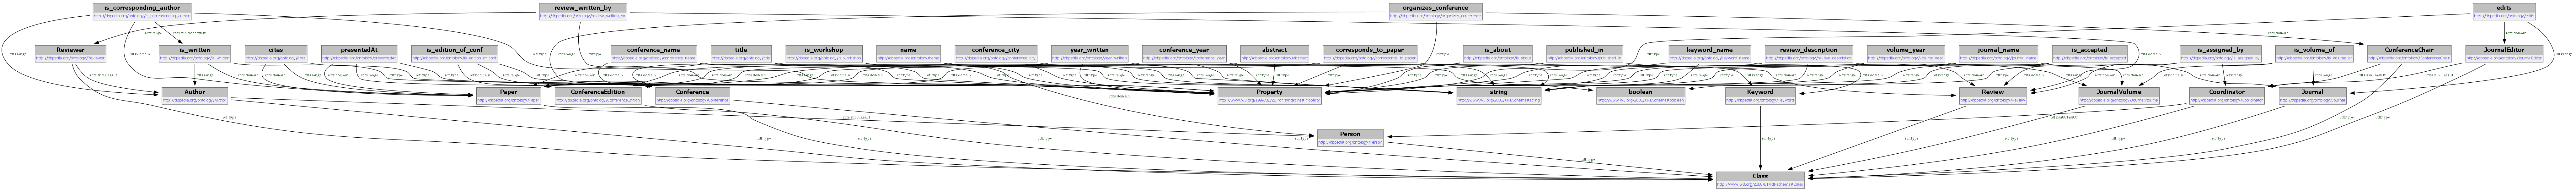

In [7]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png)) 

visualize(g)

We can also save the file and print the graph triplets:

In [8]:
g.serialize("output_files/tbox.ttl", format="turtle")
print(g.serialize(format="turtle"))

@prefix ns1: <http://dbpedia.org/ontology/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ns1:Author a rdfs:Class ;
    rdfs:subClassOf ns1:Person .

ns1:Conference a rdfs:Class .

ns1:ConferenceChair a rdfs:Class ;
    rdfs:subClassOf ns1:Coordinator .

ns1:ConferenceEdition a rdfs:Class .

ns1:Coordinator a rdfs:Class ;
    rdfs:subClassOf ns1:Person .

ns1:Journal a rdfs:Class .

ns1:JournalEditor a rdfs:Class ;
    rdfs:subClassOf ns1:Coordinator .

ns1:JournalVolume a rdfs:Class .

ns1:Keyword a rdfs:Class .

ns1:Paper a rdfs:Class .

ns1:Person a rdfs:Class .

ns1:Review a rdfs:Class .

ns1:Reviewer a rdfs:Class ;
    rdfs:subClassOf ns1:Author .

ns1:abstract a rdf:Property ;
    rdfs:domain ns1:Paper ;
    rdfs:range xsd:string .

ns1:cites a rdf:Property ;
    rdfs:domain ns1:Paper ;
    rdfs:range ns1:Paper .

ns1:conference_city a rdf:Property ;
    rd

Other visualization option using networkX and gephi external tool:

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import re

def extract_nodes(s):
     # keep the string after the last hashtag or frontslash
    match = re.search(r'[^/#]+$', s)
    return str(match.group(0)) if match else None

def extract_edge(s):
    # keep the string after the last hashtag or frontslash
    match = re.search(r'[^/#]+$', s)
    label = str(match.group(0)) 
    if label == 'type':
        label = 'rdf:type'
    elif label in ['range', 'domain', 'subClassOf', 'subPropertyOf']:
        label = 'rdfs:' + label
    return label if match else None
    

G = nx.DiGraph()

for s, p, o in g:
    G.add_edge(extract_nodes(s),
               extract_nodes(o),
               label=extract_edge(p))

nx.write_graphml(G, "output_files/gephi_graph.graphml")

Let's viualize the results using matplotlib:

In [ ]:
# Set layout
pos = nx.spring_layout(G, k=0.5, iterations=50)  # k controls spacing

# Draw nodes and edges
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=8, arrows=True)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.title("RDF Graph Visualization")
plt.axis("off")
plt.tight_layout()
plt.show()